# Self-Organizing Map (SOM) with Radius-Based Neighborhood (2x2 Grid)

SOM stands for Self-Organizing Map, a type of unsupervised neural network introduced by Teuvo Kohonen. It’s used mainly for dimensionality reduction, clustering, and data visualization — especially useful when working with high-dimensional data.



### Best Matching Unit (BMU) – Short Note

The **Best Matching Unit (BMU)** in a Self-Organizing Map (SOM) is the **neuron (node) whose weight vector is most similar to a given input vector**.

- It is identified using a **distance metric**, usually **Euclidean distance**:

  $$
  \text{BMU} = \arg\min_i \|\mathbf{x} - \mathbf{w}_i\|
  $$

  where:
  - $\mathbf{x} $ is the input vector
  - $\mathbf{w}_i $ is the weight vector of node \(i\)

- During training:
  - The **BMU and its neighbors** are updated to better match the input.
  - This helps preserve the **topology** of the data on the SOM grid.

> 🔍 The BMU is the **"winning" neuron** — the one that best represents the current input sample.


### Imports and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sample 2D input data
data = np.array([
    [0.1, 0.8],
    [0.2, 0.6],
    [0.9, 0.2],
    [0.8, 0.4]
])

### Initialize SOM Parameters


#### Neighborhood Radius
- The **radius** defines how many surrounding nodes are updated along with the BMU.
- A **radius of 0** updates only the BMU.
- A **radius of 1 or 2** includes neighboring nodes, helping preserve input topology.

In [3]:
grid_shape = (2, 2)
input_dim = 2
learning_rate = 0.5
radius = 1
epochs = 2

# Random seed for reproducibility
np.random.seed(42)
weights = np.random.rand(grid_shape[0], grid_shape[1], input_dim)


### Distance & Update Helpers

In [4]:
def euclidean(a, b):
    return np.linalg.norm(a - b)

def gaussian_decay(distance, radius):
    return np.exp(-distance**2 / (2 * (radius**2)))

### Training Loop (with Radius-Based Neighborhood)

#### Weight Update Rule
- Weights of the BMU and its neighbors are updated like:

  $$
  \mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} + \alpha \cdot \theta \cdot (\mathbf{x} - \mathbf{w}_{\text{old}})
  $$

  where:
  - $\alpha $ = learning rate
  - $ \theta $ = neighborhood influence (e.g., Gaussian decay)

In [5]:
for epoch in range(epochs):
    print(f"\n🔁 Epoch {epoch+1}")

    for idx, sample in enumerate(data):
        # Find BMU
        bmu_idx = None
        min_dist = float('inf')

        for i in range(grid_shape[0]):
            for j in range(grid_shape[1]):
                dist = euclidean(sample, weights[i, j])
                if dist < min_dist:
                    min_dist = dist
                    bmu_idx = (i, j)

        print(f"\n  ▶ Sample {idx+1}: {sample}")
        print(f"     BMU: {bmu_idx}, Weight: {weights[bmu_idx]}")

        # Update BMU and neighbors
        for i in range(grid_shape[0]):
            for j in range(grid_shape[1]):
                dist_to_bmu = euclidean(np.array([i, j]), np.array(bmu_idx))
                if dist_to_bmu <= radius:
                    influence = gaussian_decay(dist_to_bmu, radius)
                    weights[i, j] += learning_rate * influence * (sample - weights[i, j])
                    print(f"     → Updated ({i},{j}) to {weights[i,j]} with influence {influence:.3f}")



🔁 Epoch 1

  ▶ Sample 1: [0.1 0.8]
     BMU: (1, 1), Weight: [0.05808361 0.86617615]
     → Updated (0,1) to [0.54033209 0.65971839] with influence 0.607
     → Updated (1,0) to [0.13903013 0.35129905] with influence 0.607
     → Updated (1,1) to [0.07904181 0.83308807] with influence 1.000

  ▶ Sample 2: [0.2 0.6]
     BMU: (1, 0), Weight: [0.13903013 0.35129905]
     → Updated (0,0) to [0.32160815 0.84435482] with influence 0.607
     → Updated (1,0) to [0.16951506 0.47564953] with influence 1.000
     → Updated (1,1) to [0.11572423 0.76240054] with influence 0.607

  ▶ Sample 3: [0.9 0.2]
     BMU: (0, 1), Weight: [0.54033209 0.65971839]
     → Updated (0,0) to [0.49701435 0.64894434] with influence 0.607
     → Updated (0,1) to [0.72016605 0.42985919] with influence 1.000
     → Updated (1,1) to [0.35356788 0.59184396] with influence 0.607

  ▶ Sample 4: [0.8 0.4]
     BMU: (0, 1), Weight: [0.72016605 0.42985919]
     → Updated (0,0) to [0.58889939 0.57344815] with influence 0.607

### Final Weights After Training

In [6]:
print("\n📦 Final SOM Weights:")
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        print(f" Node ({i},{j}): {weights[i,j]}")



📦 Final SOM Weights:
 Node (0,0): [0.61125353 0.46908599]
 Node (0,1): [0.81502076 0.3537324 ]
 Node (1,0): [0.16737877 0.61891238]
 Node (1,1): [0.58770158 0.45971089]


### Assign Each Input to Its BMU

In [7]:
# Step: map each input sample to a SOM node (its BMU)
sample_to_bmu = []

for sample in data:
    bmu_idx = None
    min_dist = float('inf')
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            dist = euclidean(sample, weights[i, j])
            if dist < min_dist:
                min_dist = dist
                bmu_idx = (i, j)
    sample_to_bmu.append(bmu_idx)


### Plot SOM Grid and Assignments (Cluster View)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


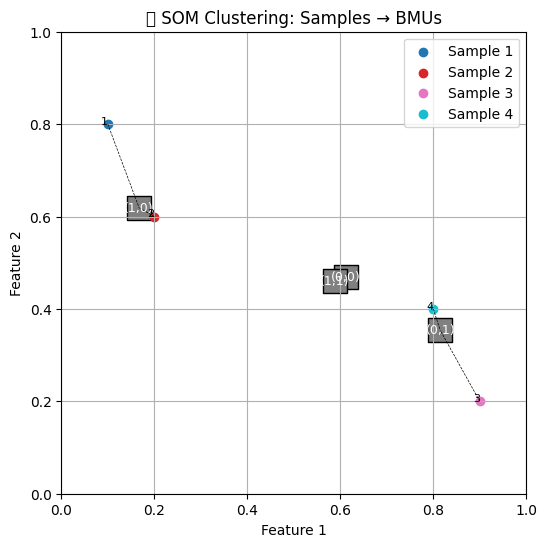

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(figsize=(6, 6))

# Plot SOM nodes
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        w = weights[i, j]
        ax.scatter(w[0], w[1], marker='s', s=300, color='gray', edgecolors='black')
        ax.text(w[0], w[1], f'({i},{j})', fontsize=9, ha='center', va='center', color='white')

# Plot input samples and their BMU connections
colors = cm.tab10(np.linspace(0, 1, len(data)))
for idx, (sample, bmu) in enumerate(zip(data, sample_to_bmu)):
    bmu_weight = weights[bmu]
    ax.plot([sample[0], bmu_weight[0]], [sample[1], bmu_weight[1]], 'k--', linewidth=0.5)
    ax.scatter(sample[0], sample[1], color=colors[idx], label=f'Sample {idx+1}')
    ax.text(sample[0], sample[1], f'{idx+1}', fontsize=8, ha='right')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("🔍 SOM Clustering: Samples → BMUs")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.grid(True)
ax.legend()
plt.show()
